# TASK-1:  Customer Personality Analysis
  * Problem Statement:
  - Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

In [41]:
# import libreries
import pandas as pd
import numpy as np

In [42]:
## Read the the data
customer_data = pd.read_csv('/content/marketing_campaign.csv')

In [43]:
## Check the dataset
customer_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [44]:
# Check total rows and columns
customer_data.shape

(2240, 29)

 * There are 2240 rows and 29 columns

In [45]:
# Check information
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [46]:
# Check the distribution
customer_data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


 # Missing values
   In this data sets only one column- Income  have null values.

In [47]:
# Check the null values in the datasets
customer_data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [48]:
## Fill the missing values
customer_data['Income'].fillna(customer_data['Income'].mean(), inplace=True)

/tmp/ipython-input-2527640381.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_data['Income'].fillna(customer_data['Income'].mean(), inplace=True)


In [49]:
## Again check the null values in the data sets
customer_data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


 # Duplicates Values

In [50]:
# Check duplicate values in the datasets
customer_data.duplicated().any()

np.False_

   * In the datasets there are no duplicate values. If, found any duplicate values then, drop the values.

 # Standardize format

In [51]:
# Check each column have in unnique values
customer_data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [52]:
customer_data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [53]:
customer_data['Dt_Customer'].unique()

array(['4/9/2012', '8/3/2014', '21-08-2013', '10/2/2014', '19-01-2014',
       '9/9/2013', '13-11-2012', '8/5/2013', '6/6/2013', '13-03-2014',
       '15-11-2013', '10/10/2012', '24-11-2012', '24-12-2012',
       '31-08-2012', '28-03-2013', '3/11/2012', '8/8/2012', '6/1/2013',
       '23-12-2012', '11/1/2014', '18-03-2013', '2/1/2013', '27-05-2013',
       '20-02-2013', '31-05-2013', '22-11-2013', '22-05-2014',
       '11/5/2013', '29-10-2012', '29-08-2013', '31-12-2013', '2/9/2013',
       '11/2/2014', '1/2/2013', '29-04-2013', '12/3/2013', '5/11/2013',
       '2/10/2013', '28-06-2014', '9/11/2012', '24-05-2013', '1/1/2014',
       '8/11/2012', '12/5/2014', '11/8/2012', '7/6/2014', '12/6/2013',
       '19-11-2012', '2/4/2013', '28-04-2014', '17-06-2013', '3/3/2014',
       '4/7/2013', '7/9/2012', '18-02-2013', '11/6/2013', '6/12/2013',
       '21-05-2013', '11/5/2014', '19-03-2014', '27-09-2013', '8/4/2013',
       '11/9/2012', '14-09-2012', '17-03-2013', '5/4/2013', '30-04-2014',
   

In [35]:
## Only 'Dt_Customer' column have inconsistency format.
##  Convert date formats to a consistent type (e.g., dd-mm-yyyy).

In [36]:
## Convert 'Dt_Customer' to datetime objects, coercing errors
customer_data['Dt_Customer'] = pd.to_datetime(customer_data['Dt_Customer'], errors='coerce')

In [54]:
# Format 'Dt_Customer' to 'dd-mm-yyyy' string format
customer_data['Dt_Customer'] = customer_data['Dt_Customer'].str.replace('/', '-', regex=False)

In [55]:
customer_data['Dt_Customer'].unique()

array(['4-9-2012', '8-3-2014', '21-08-2013', '10-2-2014', '19-01-2014',
       '9-9-2013', '13-11-2012', '8-5-2013', '6-6-2013', '13-03-2014',
       '15-11-2013', '10-10-2012', '24-11-2012', '24-12-2012',
       '31-08-2012', '28-03-2013', '3-11-2012', '8-8-2012', '6-1-2013',
       '23-12-2012', '11-1-2014', '18-03-2013', '2-1-2013', '27-05-2013',
       '20-02-2013', '31-05-2013', '22-11-2013', '22-05-2014',
       '11-5-2013', '29-10-2012', '29-08-2013', '31-12-2013', '2-9-2013',
       '11-2-2014', '1-2-2013', '29-04-2013', '12-3-2013', '5-11-2013',
       '2-10-2013', '28-06-2014', '9-11-2012', '24-05-2013', '1-1-2014',
       '8-11-2012', '12-5-2014', '11-8-2012', '7-6-2014', '12-6-2013',
       '19-11-2012', '2-4-2013', '28-04-2014', '17-06-2013', '3-3-2014',
       '4-7-2013', '7-9-2012', '18-02-2013', '11-6-2013', '6-12-2013',
       '21-05-2013', '11-5-2014', '19-03-2014', '27-09-2013', '8-4-2013',
       '11-9-2012', '14-09-2012', '17-03-2013', '5-4-2013', '30-04-2014',
   

  * Change the date format in ('dd-mm-yyyy')

In [56]:
# Change the data type of 'Dt_Customer' object to dttime.
customer_data['Dt_Customer'] = pd.to_datetime(customer_data['Dt_Customer'], errors='coerce')


In [58]:
# Again check the type
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          916 non-null    datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [59]:
## Check rows where 'Dt_Customer' is NAN after conversion
nan_dates = customer_data[customer_data['Dt_Customer'].isna()]

## Display the original 'Dt_Customer' values for these rows
display(nan_dates['Dt_Customer'].head())

,Dt_Customer
2,NaT
4,NaT
6,NaT
9,NaT
10,NaT


 * Here in Dt_Customer column have many Nat values. If we drop the Nat values then in half of rows are deleted. Then replace them with aggregate functions.

In [63]:
# Replace NaT with the Column Mean or Median
customer_data['Dt_Customer'] = customer_data['Dt_Customer'].fillna(customer_data['Dt_Customer'].median())

In [65]:
customer_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09 00:00:00,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03 00:00:00,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-07-01 12:00:00,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02 00:00:00,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2013-07-01 12:00:00,94,173,...,5,0,0,0,0,0,0,3,11,0


In [66]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

   #  Get some statistical analysis

In [72]:
# Select only numeric columns for correlation calculation
numeric_customer_data= customer_data.select_dtypes(include=np.number)
# Calculate correlation matrix
correlation_matrix=numeric_customer_data.corr()
correlation_matrix.corr()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,1.000000,0.008566,-0.112164,0.080306,-0.005711,-0.111453,-0.182436,-0.109308,-0.124651,-0.131938,...,0.045323,-0.131714,-0.153276,-0.142803,-0.168248,-0.124069,0.047456,NaN,NaN,-0.158828
Year_Birth,0.008566,1.000000,-0.446604,0.471828,-0.501737,-0.051781,-0.471498,-0.255238,-0.278124,-0.268895,...,0.308918,0.115390,-0.267070,-0.171502,-0.177228,-0.097900,-0.023633,NaN,NaN,-0.043973
Income,-0.112164,-0.446604,1.000000,-0.895261,-0.223086,-0.086549,0.906888,0.835342,0.911678,0.844887,...,-0.923064,-0.135769,0.329783,0.668307,0.603558,0.113843,-0.213195,NaN,NaN,0.282399
Kidhome,0.080306,0.471828,-0.895261,1.000000,0.163100,0.046767,-0.919033,-0.830606,-0.869550,-0.838671,...,0.853160,0.069601,-0.368265,-0.629287,-0.580555,-0.174236,0.171476,NaN,NaN,-0.296657
Teenhome,-0.005711,-0.501737,-0.223086,0.163100,1.000000,0.046799,-0.202375,-0.423014,-0.467024,-0.434414,...,0.371584,-0.153749,-0.015820,-0.482393,-0.437124,-0.102266,0.030888,NaN,NaN,-0.393007
Recency,-0.111453,-0.051781,-0.086549,0.046767,0.046799,1.000000,-0.111511,-0.087022,-0.077856,-0.076303,...,0.000705,-0.169614,-0.076628,-0.134935,-0.165980,-0.105552,-0.003349,NaN,NaN,-0.454518
MntWines,-0.182436,-0.471498,0.906888,-0.919033,-0.202375,-0.111511,1.000000,0.769076,0.870297,0.781773,...,-0.815125,-0.082776,0.496167,0.737011,0.652621,0.234692,-0.258751,NaN,NaN,0.383950
MntFruits,-0.109308,-0.255238,0.835342,-0.830606,-0.423014,-0.087022,0.769076,1.000000,0.901867,0.936881,...,-0.876933,-0.089561,0.096611,0.556016,0.520961,-0.034444,-0.182640,NaN,NaN,0.254452
MntMeatProducts,-0.124651,-0.278124,0.911678,-0.869550,-0.467024,-0.077856,0.870297,0.901867,1.000000,0.915407,...,-0.930086,-0.068407,0.237371,0.702960,0.643269,0.070478,-0.206896,NaN,NaN,0.375648
MntFishProducts,-0.131938,-0.268895,0.844887,-0.838671,-0.434414,-0.076303,0.781773,0.936881,0.915407,1.000000,...,-0.888281,-0.093788,0.114736,0.562543,0.567762,-0.013360,-0.194449,NaN,NaN,0.256675


In [ ]:
# Drop the columns 'Z_CostContact' and 'Z_Revenue' as they have constant values
customer_data = customer_data.drop(['Z_CostContact','Z_Revenue'],axis=1)

      * There are showing lot of Nan values in two columns. Z_CostContact,Z_Revenue. Then drop the two coulmns.

In [76]:
numeric_customer_data= customer_data.select_dtypes(include=np.number)
# Calculate correlation matrix
correlation_matrix=numeric_customer_data.corr()
correlation_matrix.corr()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
ID,1.000000,0.008566,-0.112164,0.080306,-0.005711,-0.111453,-0.182436,-0.109308,-0.124651,-0.131938,...,-0.140303,-0.142263,0.045323,-0.131714,-0.153276,-0.142803,-0.168248,-0.124069,0.047456,-0.158828
Year_Birth,0.008566,1.000000,-0.446604,0.471828,-0.501737,-0.051781,-0.471498,-0.255238,-0.278124,-0.268895,...,-0.390294,-0.454903,0.308918,0.115390,-0.267070,-0.171502,-0.177228,-0.097900,-0.023633,-0.043973
Income,-0.112164,-0.446604,1.000000,-0.895261,-0.223086,-0.086549,0.906888,0.835342,0.911678,0.844887,...,0.927871,0.897293,-0.923064,-0.135769,0.329783,0.668307,0.603558,0.113843,-0.213195,0.282399
Kidhome,0.080306,0.471828,-0.895261,1.000000,0.163100,0.046767,-0.919033,-0.830606,-0.869550,-0.838671,...,-0.914040,-0.912314,0.853160,0.069601,-0.368265,-0.629287,-0.580555,-0.174236,0.171476,-0.296657
Teenhome,-0.005711,-0.501737,-0.223086,0.163100,1.000000,0.046799,-0.202375,-0.423014,-0.467024,-0.434414,...,-0.330063,-0.128174,0.371584,-0.153749,-0.015820,-0.482393,-0.437124,-0.102266,0.030888,-0.393007
Recency,-0.111453,-0.051781,-0.086549,0.046767,0.046799,1.000000,-0.111511,-0.087022,-0.077856,-0.076303,...,-0.082410,-0.074379,0.000705,-0.169614,-0.076628,-0.134935,-0.165980,-0.105552,-0.003349,-0.454518
MntWines,-0.182436,-0.471498,0.906888,-0.919033,-0.202375,-0.111511,1.000000,0.769076,0.870297,0.781773,...,0.913990,0.914430,-0.815125,-0.082776,0.496167,0.737011,0.652621,0.234692,-0.258751,0.383950
MntFruits,-0.109308,-0.255238,0.835342,-0.830606,-0.423014,-0.087022,0.769076,1.000000,0.901867,0.936881,...,0.874098,0.831418,-0.876933,-0.089561,0.096611,0.556016,0.520961,-0.034444,-0.182640,0.254452
MntMeatProducts,-0.124651,-0.278124,0.911678,-0.869550,-0.467024,-0.077856,0.870297,0.901867,1.000000,0.915407,...,0.962798,0.848372,-0.930086,-0.068407,0.237371,0.702960,0.643269,0.070478,-0.206896,0.375648
MntFishProducts,-0.131938,-0.268895,0.844887,-0.838671,-0.434414,-0.076303,0.781773,0.936881,0.915407,1.000000,...,0.894287,0.834681,-0.888281,-0.093788,0.114736,0.562543,0.567762,-0.013360,-0.194449,0.256675


In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

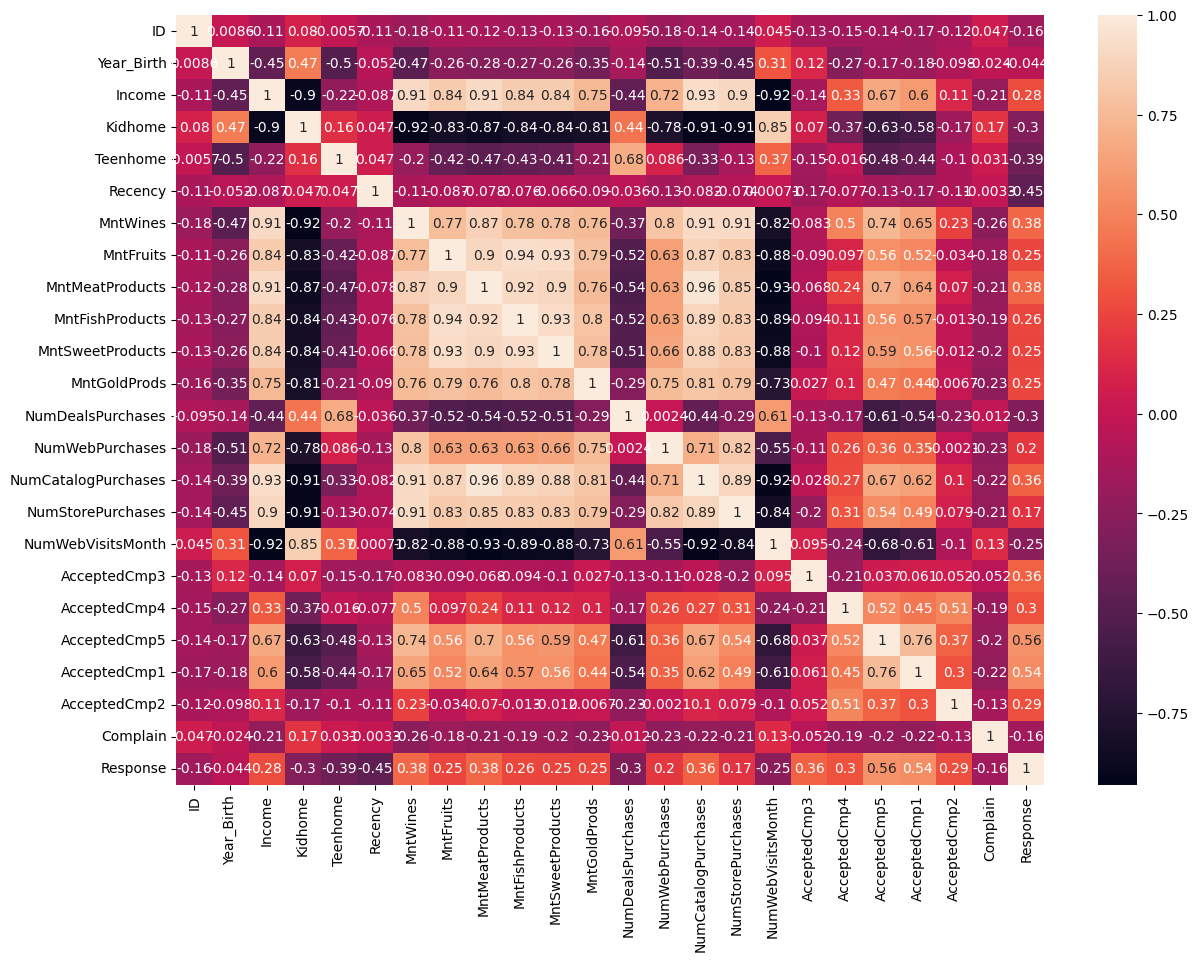

In [83]:
## Visualization. Compute pairwise correlation of columns, excluding NA/null values.
plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix.corr(), annot=True)

In [89]:
customer_data.to_csv('/content/customer_clean_data.csv')